Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

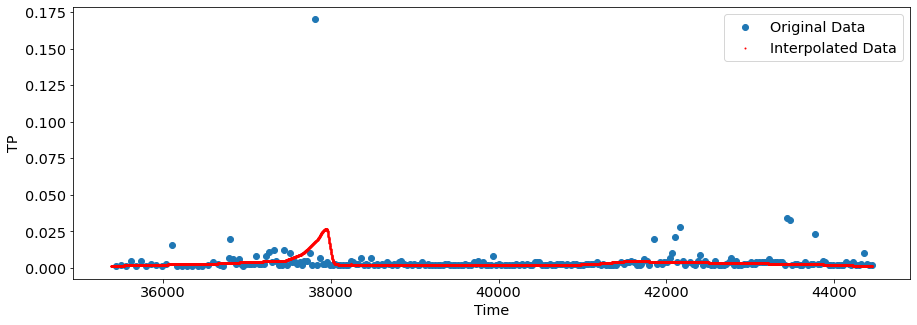

313/313 [==============================] - 0s 353us/step - loss: 1.3054e-17
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB39A_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB39A.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 35438.36                       
time_max = 44454.51                           

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.003398761
,0.009942571
,0.016708205
,0.023473839
,0.030239473
,0.037005107
,0.043881653
,0.050425463
,0.057191097
,0.063956731
,0.070722365
,0.077488
,0.084364546
,0.090908356
,0.09767399
,0.104439624
,0.111205258
,0.117970892
,0.124847438
,0.13150216
,0.145033428
,0.664878133
,0.708688387
,0.756047825
])
interpolation

array([[0.00320799],
       [0.00376603],
       [0.00434298],
       [0.00491995],
       [0.00549695],
       [0.0060739 ],
       [0.00666035],
       [0.00721839],
       [0.00758534],
       [0.00775594],
       [0.00792655],
       [0.00809714],
       [0.00827056],
       [0.0084305 ],
       [0.00848836],
       [0.00854621],
       [0.00857098],
       [0.00954399],
       [0.01053294],
       [0.01148998],
       [0.01343596],
       [0.01833425],
       [0.01982465],
       [0.01738317]], dtype=float32)